### Goal / Purpose
The purpose of this dataset is **student performance classification** — predicting whether a student will **pass or fail** based on various academic and behavioral factors.  
This task belongs to the same family of classification problems as *requirements classification* or *defect prediction*, but it focuses on the education domain.  
By identifying at-risk students early, the goal is to provide actionable insights to help improve their academic success.

### Type of Machine Learning Task
This is a **supervised learning classification** problem, where the model predicts one of two classes: **Pass or Fail**.

### Dataset Source
The dataset is publicly available on **Kaggle** and can be accessed here:  
🔗 [Student Performance Prediction Dataset – Kaggle](https://www.kaggle.com/datasets/souradippal/student-performance-prediction)

Installs and imports needed libraries for data handling and visualization, preparing the environment for preprocessing.


In [178]:
# Install required libraries
import sys
print("Installing required libraries...")
!{sys.executable} -m pip install matplotlib seaborn pandas numpy scipy --quiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 5)
%matplotlib inline
print("="*80)
print("LIBRARIES IMPORTED SUCCESSFULLY")
print("="*80)

Installing required libraries...
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
LIBRARIES IMPORTED SUCCESSFULLY


Loads the dataset from the CSV file into a pandas DataFrame.


In [221]:
df = pd.read_csv('Dataset/student_performance_prediction.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


Displays basic dataset details: number of rows, columns, data types, and target variable distribution, to understand the datasets structure.


In [222]:
# --- General Information ---
print("=== GENERAL INFORMATION ===")

# 1. Number of observations/features
print(f"Number of observations (rows): {df.shape[0]}")
print(f"Number of features (columns): {df.shape[1]}")

# 2. Data types
print("\n--- Data Types ---")
print(df.dtypes)

# 3. Description of the target variable
target_col = 'Passed'  
print(f"\n--- Target Variable: {target_col} ---")
print("Unique classes and their counts:")
print(df[target_col].value_counts())
print("\nClass distribution (in %):")
print(round(df[target_col].value_counts(normalize=True) * 100, 2))

=== GENERAL INFORMATION ===
Number of observations (rows): 40000
Number of features (columns): 7

--- Data Types ---
Student ID                                      object
Study Hours per Week                           float64
Attendance Rate                                float64
Previous Grades                                float64
Participation in Extracurricular Activities     object
Parent Education Level                          object
Passed                                          object
dtype: object

--- Target Variable: Passed ---
Unique classes and their counts:
Passed
Yes    19011
No     18989
Name: count, dtype: int64

Class distribution (in %):
Passed
Yes    50.03
No     49.97
Name: proportion, dtype: float64


Displays dataset summaries, checks for missing values, and visualizes numeric and categorical variable distributions to understand data patterns, detect imbalance, and prepare for preprocessing.

=== SUMMARY & VISUALIZATION ===

=== Statistical Summary (Numeric Columns) ===


,count,mean,std,min,25%,50%,75%,max
Study Hours per Week,38005.0,9.962744,5.031154,-12.3,6.6,10.0,13.4,32.4
Attendance Rate,38008.0,75.276323,20.393418,-14.3,61.6,75.3,88.8,150.2
Previous Grades,38006.0,65.440107,16.503119,8.3,55.1,65.2,75.2,200.0



=== Variance of Numeric Columns ===
Study Hours per Week     25.312508
Attendance Rate         415.891489
Previous Grades         272.352934
dtype: float64

=== Missing Value Analysis ===


,Missing Values,Percentage (%)
Student ID,0,0.00
Study Hours per Week,1995,4.99
Attendance Rate,1992,4.98
Previous Grades,1994,4.98
Participation in Extracurricular Activities,2000,5.00
Parent Education Level,2000,5.00
Passed,2000,5.00


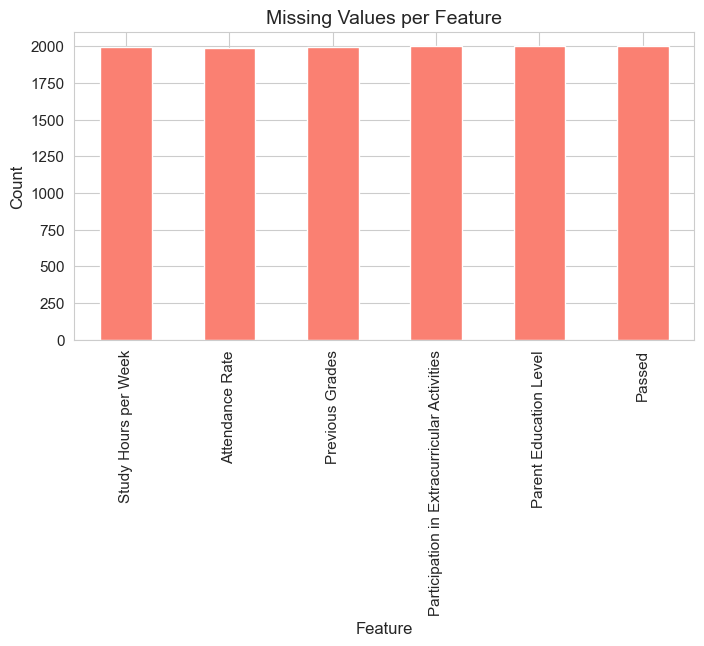

Plotting numeric columns: ['Study Hours per Week', 'Attendance Rate', 'Previous Grades']


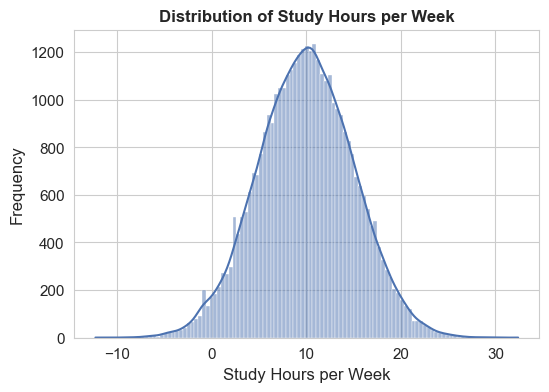

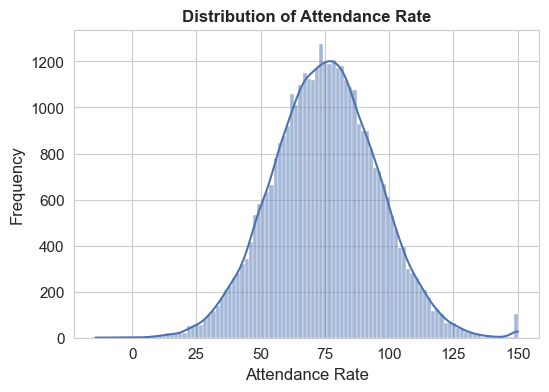

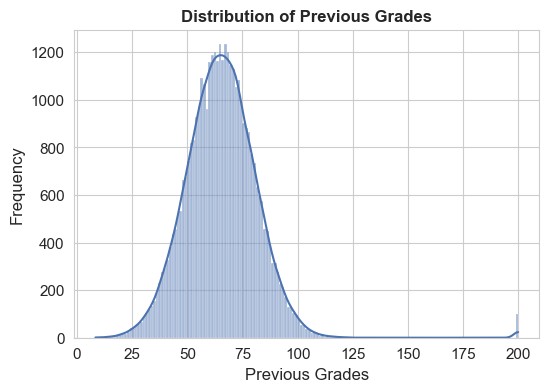

Plotting categorical columns: ['Participation in Extracurricular Activities', 'Parent Education Level']


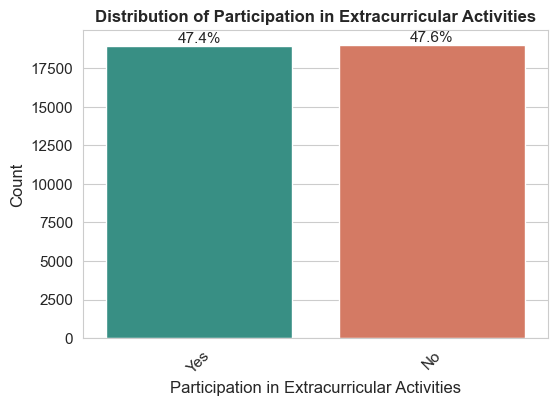

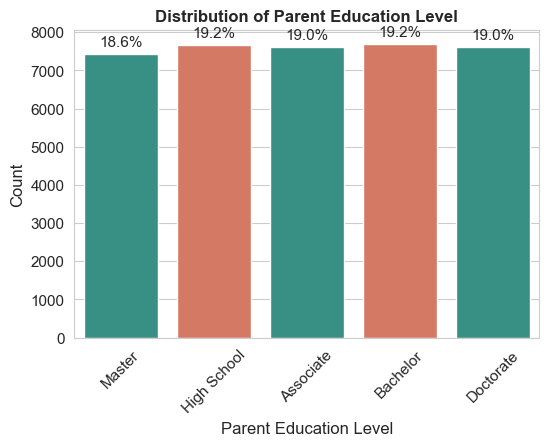

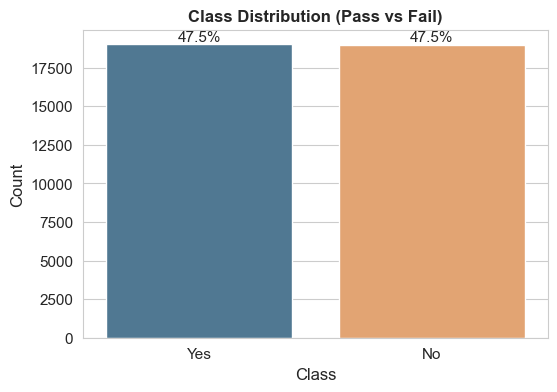


Class Distribution (%):
Passed
Yes    50.03
No     49.97
Name: proportion, dtype: float64


In [223]:
# --- SUMMARY & VISUALIZATION ---
print("=== SUMMARY & VISUALIZATION ===\n")

# 1. Statistical Summaries
print("=== Statistical Summary (Numeric Columns) ===")
display(df.describe().T)
print("\n=== Variance of Numeric Columns ===")
print(df.var(numeric_only=True))

# 2. Missing Value Analysis
print("\n=== Missing Value Analysis ===")
missing = df.isnull().sum()
missing_summary = pd.DataFrame({
    'Missing Values': missing,
    'Percentage (%)': (df.isnull().mean() * 100).round(2)
})
display(missing_summary)
if (missing_summary['Missing Values'] > 0).any():
    plt.figure(figsize=(8,4))
    missing_summary[missing_summary['Missing Values'] > 0]['Missing Values'].plot(
        kind='bar', color='salmon'
    )
    plt.title('Missing Values per Feature')
    plt.ylabel('Count')
    plt.xlabel('Feature')
    plt.show()
else:
    print("No missing values detected — skipping missing value plot.")

# 3. Distribution of Numeric Variables
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Plotting numeric columns:", numeric_cols)
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='#4C72B0')
    plt.title(f"Distribution of {col}", fontsize=12, weight='bold')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# 4. Distribution of Categorical Variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['Student ID', 'Passed']]
print("Plotting categorical columns:", categorical_cols)
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette=['#2A9D8F', '#E76F51'])
    plt.title(f"Distribution of {col}", fontsize=12, weight='bold')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    total = len(df[col])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width()/2, height + total*0.005,
                       f'{height/total*100:.1f}%', ha='center')
    plt.show()

# 5. Class Imbalance (Target Variable)
target_col = 'Passed'
if df[target_col].dtype != 'object':
    labels = df[target_col].map({1: 'Yes', 0: 'No'})
else:
    labels = df[target_col]

plt.figure(figsize=(6, 4))
sns.countplot(x=labels, palette=['#457B9D', '#F4A261'])
plt.title('Class Distribution (Pass vs Fail)', fontsize=12, weight='bold')
plt.xlabel('Class')
plt.ylabel('Count')
total = len(labels)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2, height + total*0.005,
                   f'{height/total*100:.1f}%', ha='center')
plt.show()

print("\nClass Distribution (%):")
print(round(df[target_col].value_counts(normalize=True) * 100, 2))


Cleans column names by removing extra spaces to ensure consistency and prevent errors during later data processing steps.

In [224]:
df_original = df.copy()

df.columns = [c.strip().replace("  ", " ") for c in df.columns]
df.columns


Index(['Student ID', 'Study Hours per Week', 'Attendance Rate',
       'Previous Grades', 'Participation in Extracurricular Activities',
       'Parent Education Level', 'Passed'],
      dtype='object')

Displays dataset shape, data types, and missing values to assess data completeness and identify which columns need cleaning or removal.

In [225]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False).head(20))


Shape: (40000, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB
None

Missing values per column:
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed      

Removes the "Parent Education Level" column as it’s unnecessary for analysis, simplifying the dataset and focusing on more relevant features.

In [226]:
col_to_drop = "Parent Education Level"

if col_to_drop in df.columns:
    df.drop(columns=[col_to_drop], inplace=True)
else:
    print(f"Warning: column '{col_to_drop}' not found. Available columns:\n{df.columns.tolist()}")


Deletes all rows with missing values to keep the dataset complete and avoid inaccuracies from null entries.

In [227]:
before = df.shape[0]
df.dropna(axis=0, how='any', inplace=True)
after = df.shape[0]
print(f"Dropped {before - after} rows containing nulls. New shape: {df.shape}")


Dropped 9014 rows containing nulls. New shape: (30986, 6)


Removes duplicate records to ensure each entry is unique and prevent bias or repetition in model training.

In [228]:
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"Dropped {before - after} duplicate rows. New shape: {df.shape}")


Dropped 0 duplicate rows. New shape: (30986, 6)


Scales numeric columns using Min-Max normalization so all numerical features fall between 0 and 1, ensuring equal weight and improving model performance.

In [229]:
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns to scale:", numeric_cols)

for c in numeric_cols:
    col_min = df[c].min()
    col_max = df[c].max()
    if pd.notna(col_min) and pd.notna(col_max) and col_max != col_min:
        df[c] = (df[c] - col_min) / (col_max - col_min)

df[numeric_cols].head()


Numeric columns to scale: ['Study Hours per Week', 'Attendance Rate', 'Previous Grades']


,Study Hours per Week,Attendance Rate,Previous Grades
1,0.450000,0.666261,0.272822
3,0.647619,0.553799,0.282212
4,0.438095,0.629787,0.335942
5,0.438095,0.535562,0.318206
6,0.654762,0.321581,0.444966


Saves the cleaned dataset as a new CSV file to preserve all preprocessing changes.

In [230]:
CLEAN_FILENAME = "Dataset/student_performance_cleaned.csv"
df.to_csv(CLEAN_FILENAME, index=False)
print(f"Cleaned dataset saved as: {CLEAN_FILENAME}")

Cleaned dataset saved as: Dataset/student_performance_cleaned.csv


Reloads the cleaned CSV, confirms shape, rechecks stats/variance and missing values, and replots numeric, categorical, and target distributions to verify cleaning worked and assess class balance after preprocessing.

=== SUMMARY & VISUALIZATION (After Preprocessing) ===

Cleaned dataset loaded successfully! Shape: (30986, 6)

=== Statistical Summary (Numeric Columns) ===


,count,mean,std,min,25%,50%,75%,max
Study Hours per Week,30986.0,0.465875,0.119838,0.0,0.385714,0.466667,0.547619,1.0
Attendance Rate,30986.0,0.544917,0.124226,0.0,0.461398,0.544681,0.627356,1.0
Previous Grades,30986.0,0.298052,0.086787,0.0,0.243610,0.296818,0.348983,1.0



=== Variance of Numeric Columns ===
Study Hours per Week    0.014361
Attendance Rate         0.015432
Previous Grades         0.007532
dtype: float64

=== Missing Value Analysis ===


,Missing Values,Percentage (%)
Student ID,0,0.0
Study Hours per Week,0,0.0
Attendance Rate,0,0.0
Previous Grades,0,0.0
Participation in Extracurricular Activities,0,0.0
Passed,0,0.0


No missing values detected — skipping missing value plot.

Plotting numeric columns: ['Study Hours per Week', 'Attendance Rate', 'Previous Grades']


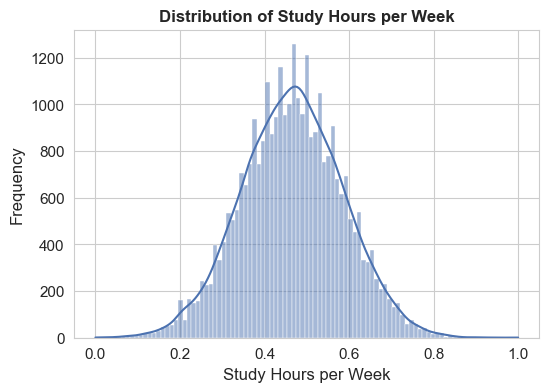

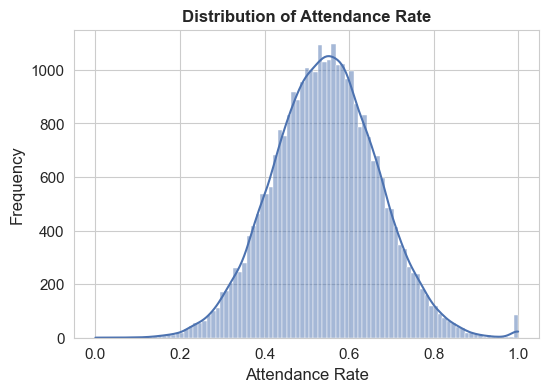

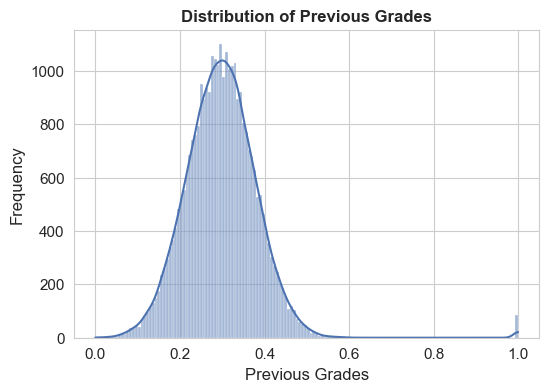


Plotting categorical columns: ['Participation in Extracurricular Activities']


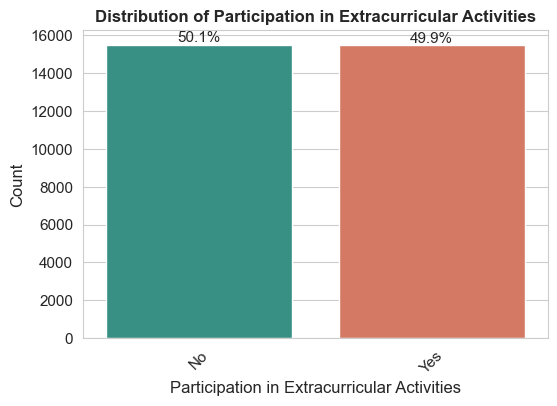

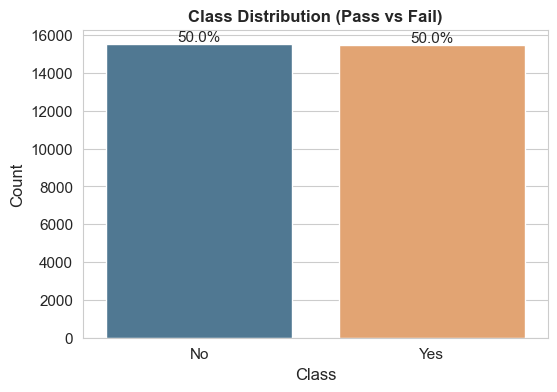


Class Distribution (%):
Passed
No     50.05
Yes    49.95
Name: proportion, dtype: float64


In [232]:
# --- SUMMARY & VISUALIZATION (After Preprocessing) ---
print("=== SUMMARY & VISUALIZATION (After Preprocessing) ===\n")

# 1. Load the cleaned dataset
df = pd.read_csv("student_performance_cleaned.csv")
print(f"Cleaned dataset loaded successfully! Shape: {df.shape}")

# 2. Statistical Summaries
print("\n=== Statistical Summary (Numeric Columns) ===")
display(df.describe().T)
print("\n=== Variance of Numeric Columns ===")
print(df.var(numeric_only=True))

# 3. Missing Value Analysis
print("\n=== Missing Value Analysis ===")
missing = df.isnull().sum()
missing_summary = pd.DataFrame({
    'Missing Values': missing,
    'Percentage (%)': (df.isnull().mean() * 100).round(2)
})
display(missing_summary)
if (missing_summary['Missing Values'] > 0).any():
    plt.figure(figsize=(8,4))
    missing_summary[missing_summary['Missing Values'] > 0]['Missing Values'].plot(
        kind='bar', color='salmon'
    )
    plt.title('Missing Values per Feature')
    plt.ylabel('Count')
    plt.xlabel('Feature')
    plt.show()
else:
    print("No missing values detected — skipping missing value plot.")

# 4. Distribution of Numeric Variables
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("\nPlotting numeric columns:", numeric_cols)
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='#4C72B0')
    plt.title(f"Distribution of {col}", fontsize=12, weight='bold')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# 5. Distribution of Categorical Variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['Student ID', 'Passed']]
print("\nPlotting categorical columns:", categorical_cols)

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette=['#2A9D8F', '#E76F51'])
    plt.title(f"Distribution of {col}", fontsize=12, weight='bold')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    
    # Add percentage labels
    total = len(df[col])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width()/2, height + total*0.005,
                       f'{height/total*100:.1f}%', ha='center')
    plt.show()

# 6. Class Imbalance (Target Variable)
target_col = 'Passed'
if df[target_col].dtype != 'object':
    labels = df[target_col].map({1: 'Yes', 0: 'No'})
else:
    labels = df[target_col]

plt.figure(figsize=(6, 4))
sns.countplot(x=labels, palette=['#457B9D', '#F4A261'])
plt.title('Class Distribution (Pass vs Fail)', fontsize=12, weight='bold')
plt.xlabel('Class')
plt.ylabel('Count')

# Add percentage labels
total = len(labels)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2, height + total*0.005,
                   f'{height/total*100:.1f}%', ha='center')

plt.show()

print("\nClass Distribution (%):")
print(round(df[target_col].value_counts(normalize=True) * 100, 2))
